# Preprocessing,Feature Extraction(CNN),Classification(ResNet50)

In [ ]:
import cv2
import glob
import numpy as np
import os

def preprocess_image(image_path):
    """ Preprocesses skin cancer images by removing hair, reducing noise, enhancing contrast, and resizing. """
    
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Hair removal using BlackHat filtering
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))  
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    _, thresh = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    img = cv2.inpaint(img, thresh, 1, cv2.INPAINT_TELEA)
    
    # Noise removal using Gaussian Blur
    img = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Contrast enhancement using CLAHE (Adaptive Histogram Equalization)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    # Resize the image to a standard size (e.g., 224x224 for deep learning models)
    img = cv2.resize(img, (224, 224))
    
    # Save the processed image (overwrite the original)
    cv2.imwrite(image_path, img)

# Input directory (Modify as needed)
input_dir = r"C:/Users/Harshitha chowdary/Downloads/sunny/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus"  # Modify as needed

# Process all images in the input directory
for img_path in glob.glob(f"{input_dir}/*.jpg"):
    preprocess_image(img_path)

print("Preprocessing completed. Images overwritten in the same directory.")

In [ ]:
!pip uninstall tensorflow keras -y


In [1]:
!pip install tensorflow==2.12 keras==2.12

  Obtaining dependency information for tensorflow==2.12 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for keras==2.12 from https://files.pythonhosted.org/packages/d5/80/34e55d7e3ed9cf18020929460f969de1bf82cf2f509c639b358ae2b25618/keras-2.12.0-py2.py3-none-any.whl.metadata
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for gast<=0.4.0,>=0.2.1 from https://files.pythonhosted.org/packages/b6/48/5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
faiss-cpu 1.9.0.post1 requires numpy<3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.


   - ------------------------------------- 11.6/272.9 MB 144.4 kB/s eta 0:30:10
   - ------------------------------------- 11.7/272.9 MB 144.7 kB/s eta 0:30:05
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:08
   - ------------------------------------- 11.7/272.9 MB 145.1 kB/s eta 0:30:01
   - ------------------------------------- 11.7/272.9 MB 145.1 kB/s eta 0:30:01
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 144.5 kB/s eta 0:30:07
   - ------------------------------------- 11.7/272.9 MB 145.2 kB/s eta 0:29:59
   - -----------------------------------

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set image size
IMG_SIZE = (224, 224)

def load_dataset(directory, class_mapping=None):
    images = []
    labels = []
    
    if class_mapping is None:
        class_names = sorted(os.listdir(directory))  # Sorted for consistency
        class_mapping = {name: idx for idx, name in enumerate(class_names)}
    
    for class_name, idx in class_mapping.items():
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):  # Skip non-directory files
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if os.path.isdir(img_path):  # Skip folders inside class folder
                continue
            
            try:
                img = load_img(img_path, target_size=IMG_SIZE)
                img = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
    
    return np.array(images), np.array(labels), class_mapping

# Paths to dataset
base_path = r"C:/Users/Harshitha chowdary/Downloads/pre processed/pre processed/Skin cancer ISIC The International Skin Imaging Collaboration"
train_path = os.path.join(base_path, "Train")
test_path = os.path.join(base_path, "Test")

# Load train dataset to establish class mapping
X_train, y_train, class_mapping = load_dataset(train_path)

# Load test dataset using the same class mapping
X_test, y_test, _ = load_dataset(test_path, class_mapping)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(class_mapping))
y_test = to_categorical(y_test, num_classes=len(class_mapping))

print(f"Dataset Loaded: {X_train.shape[0]} training images, {X_test.shape[0]} test images")

Dataset Loaded: 2239 training images, 118 test images


In [13]:
print(f"Original y_train shape: {y_train.shape}")
print(f"Original y_test shape: {y_test.shape}")


Original y_train shape: (2239, 9, 9, 9)
Original y_test shape: (118, 9, 9, 9)


In [18]:
from tensorflow.keras.utils import to_categorical

# Convert to one-hot encoding
num_classes = 9
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Print new shapes
print(f"Fixed y_train shape: {y_train.shape}")  # Expected: (2239, 9)
print(f"Fixed y_test shape: {y_test.shape}")    # Expected: (118, 9)


Fixed y_train shape: (2239, 9)
Fixed y_test shape: (118, 9)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Size and Paths
img_size = (224, 224)  # ResNet50 requires 224x224 images
batch_size = 32
dataset_path = r"C:/Users/Harshitha chowdary/Downloads/pre processed/pre processed/Skin cancer ISIC The International Skin Imaging Collaboration"  # Change this to your dataset folder

# Load Dataset using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(dataset_path, target_size=img_size,
                                         batch_size=batch_size, class_mode='categorical', shuffle=False)

# Define CNN Model for Feature Extraction
cnn_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten()
])

# Display Model Summary
cnn_model.summary()

# Extract Features from Dataset
features = cnn_model.predict(train_data, verbose=1)

# Save Extracted Features for Future Use
np.save('cnn_features.npy', features)
np.save('cnn_labels.npy', train_data.classes)  # Save labels for classification

print("Feature Extraction Completed. Features Saved as 'cnn_features.npy'.")


Found 2357 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling

In [9]:
import numpy as np
import pandas as pd

# Load the .npy file
data = np.load("cnn_features.npy", allow_pickle=True)

# Convert to DataFrame for better readability
df = pd.DataFrame(data)

# Display the first few rows
df.head()


,0,1,2,3,4,5,6,7,8,9,...,100342,100343,100344,100345,100346,100347,100348,100349,100350,100351
0,0.060920,0.080274,0.143391,0.040780,0.148623,0.0,0.0,0.029975,0.120145,0.021743,...,0.00000,0.0,0.144926,0.037376,0.121396,0.035482,0.087026,0.005807,0.123225,0.053841
1,0.074538,0.118341,0.195225,0.045436,0.199898,0.0,0.0,0.038926,0.164464,0.028791,...,0.00000,0.0,0.168238,0.036194,0.155464,0.042045,0.109414,0.025057,0.164277,0.061118
2,0.089334,0.127172,0.202033,0.039765,0.244800,0.0,0.0,0.065862,0.203058,0.046020,...,0.00000,0.0,0.188014,0.039971,0.127296,0.044333,0.075954,0.001982,0.131949,0.073134
3,0.093387,0.117129,0.198114,0.057163,0.217202,0.0,0.0,0.046003,0.171806,0.032094,...,0.00000,0.0,0.110682,0.008523,0.065951,0.018904,0.051409,0.000000,0.080525,0.048598
4,0.072470,0.116397,0.176048,0.035609,0.186288,0.0,0.0,0.041960,0.145490,0.026513,...,0.00044,0.0,0.140644,0.026623,0.103873,0.039149,0.096116,0.000539,0.127323,0.034348


Epoch 1/10
59/59 [==============================] - 42s 653ms/step - loss: 1.2336 - accuracy: 0.8859 - val_loss: 0.5281 - val_accuracy: 0.9619
Epoch 2/10
59/59 [==============================] - 35s 598ms/step - loss: 0.4750 - accuracy: 0.9167 - val_loss: 0.1645 - val_accuracy: 0.9619
Epoch 3/10
59/59 [==============================] - 35s 599ms/step - loss: 0.2784 - accuracy: 0.9374 - val_loss: 0.1523 - val_accuracy: 0.9619
Epoch 4/10
59/59 [==============================] - 35s 596ms/step - loss: 0.2626 - accuracy: 0.9438 - val_loss: 0.2034 - val_accuracy: 0.9619
Epoch 5/10
59/59 [==============================] - 34s 581ms/step - loss: 0.2670 - accuracy: 0.9454 - val_loss: 0.2091 - val_accuracy: 0.9619
Epoch 6/10
59/59 [==============================] - 34s 583ms/step - loss: 0.2610 - accuracy: 0.9469 - val_loss: 0.1616 - val_accuracy: 0.9619
Epoch 7/10
59/59 [==============================] - 34s 575ms/step - loss: 0.2312 - accuracy: 0.9469 - val_loss: 0.1721 - val_accuracy: 0.9619

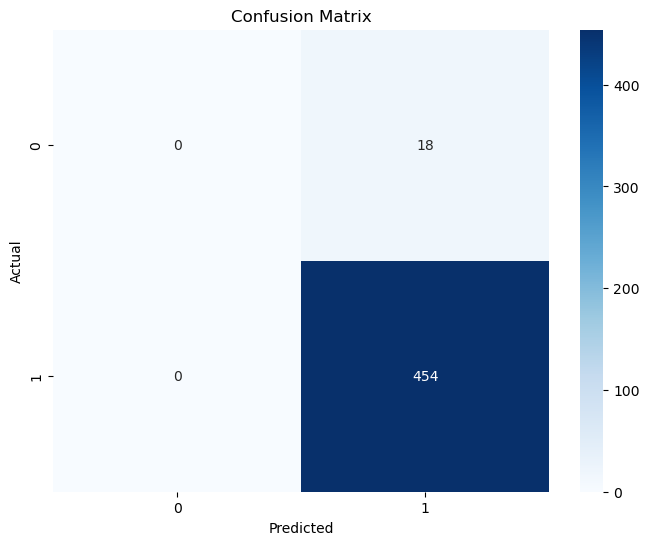

C:\Users\Harshitha chowdary\anacondaaaa\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha chowdary\anacondaaaa\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harshitha chowdary\anacondaaaa\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.96      1.00      0.98       454

    accuracy                           0.96       472
   macro avg       0.48      0.50      0.49       472
weighted avg       0.93      0.96      0.94       472



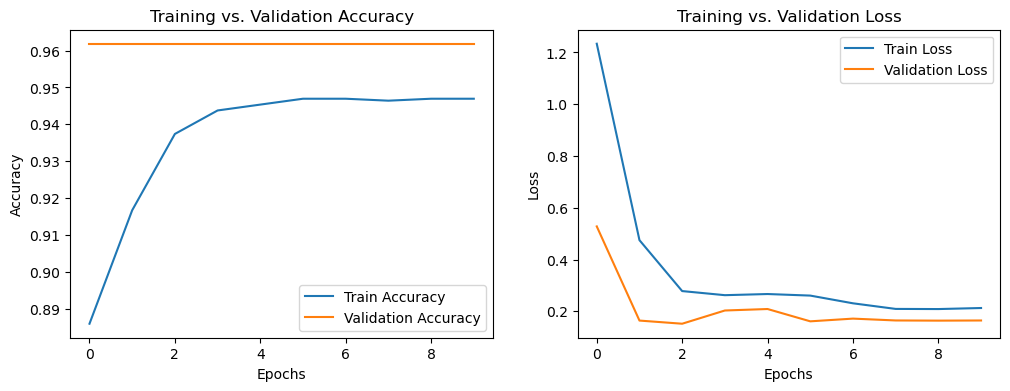

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load Extracted Features & Labels
X = np.load('cnn_features.npy')  # CNN features
y = np.load('cnn_labels.npy')    # Corresponding labels

# Convert labels to categorical format (one-hot encoding)
num_classes = len(np.unique(y))  
y = to_categorical(y, num_classes)

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Classification Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),  
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generate Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Plot Training Accuracy & Loss Graph
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()
model.save('skin_classifier_model.h5')



In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the classifier model
classifier_model = tf.keras.models.load_model('skin_classifier_model.h5')

# Load the same CNN model used for feature extraction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input

cnn_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten()
])

# Image path
image_path = r"C:/Users/Harshitha chowdary/Downloads/pre processed/pre processed/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/ISIC_0024973.jpg"

# Load and preprocess image
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0  # match training rescale
img_array = np.expand_dims(img_array, axis=0)

# Extract features using the same CNN
features = cnn_model.predict(img_array)

# Predict using classifier
prediction = classifier_model.predict(features)
predicted_class = np.argmax(prediction)

# Class mapping
class_mapping = {
    0: 'actinic keratosis',
    1: 'basal cell carcinoma',
    2: 'pigmented benign keratosis',
    3: 'dermatofibroma',
    4: 'melanocytic nevi',
    5: 'melanoma',
    6: 'squamous cell carcinoma',
    7: 'seborrheic keratosis',
    8: 'vascular lesion'
}

print(f"Predicted Class: {class_mapping[predicted_class]}")


1/1 [==============================] - 0s 116ms/step
Predicted Class: dermatofibroma
